In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3
import scoobi.scoobi as scoobi

import lina


/opt/conda/envs/km310env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [3]:
date = 20240815
coro_ims = xp.array(lina.utils.load_fits(f'camsci-streams/{date}_ims_with_llowfsc.fits'))

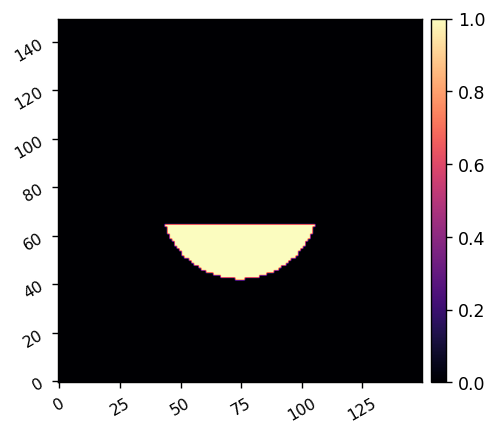

In [6]:

npsf = 150
pxscl = 0.307
iwa = 3
owa = 10
rot = 90
dh_mask = lina.utils.create_annular_focal_plane_mask(npsf, pxscl, irad=iwa, orad=owa, edge=iwa, rotation=rot)
imshow1(dh_mask)

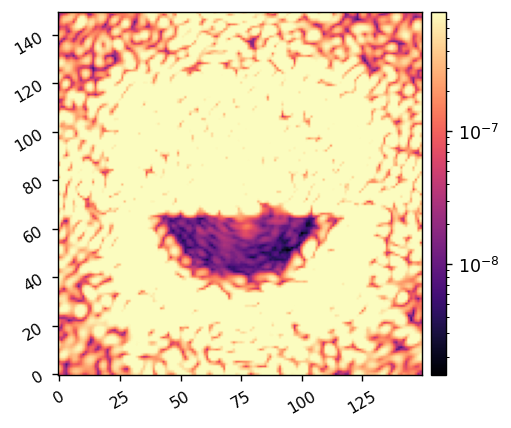

In [9]:
imshow1(coro_ims[1000], lognorm=True)

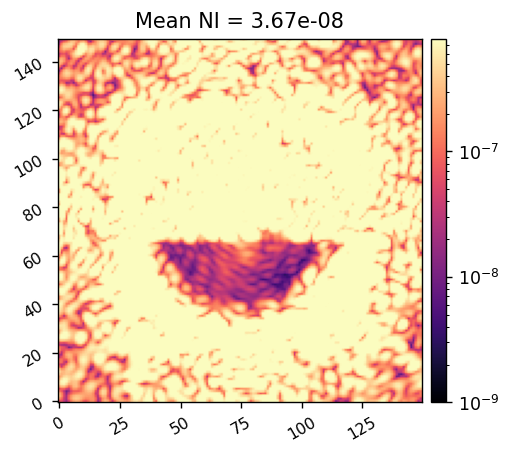

In [13]:
mean_coro_im = coro_ims.mean(axis=0)
mean_ni = xp.mean(mean_coro_im[dh_mask])
imshow1(mean_coro_im, f'Mean NI = {mean_ni:.2e}', lognorm=1, vmin=1e-9)